In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
## Here,we are creating a histogram from a given image

def histogram(img,title,show):
  hist=np.zeros([256])
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      pixel=int(img[x,y])
      hist[pixel]+=1
  hist=hist/(img.shape[0]*img.shape[1])

  if show:
    print_hist(hist, title)
  return hist

## for printing the created histogram

def print_hist(hist, title):
  plt.plot(hist,color="purple")
  plt.bar(np.arange(len(hist)),hist,color="orange")
  plt.xlabel("Intensity")
  plt.ylabel("Pixels")
  plt.title(title)
  plt.show()
  print()
  return

## to add gaussian noise to an imput image

def gaussian_noise(mean,sd,img):
  noise=np.random.normal(mean,sd,img.shape).astype('uint8')
  noisy_img=cv2.add(img,noise)
  return noisy_img

## for dtermining the threshold value for binarisation

def otsu(img):
    histo=histogram(img,"histogram",0)
    histo = histo.astype(float) / histo.sum()

    max = 0
    thres = 0
    for t in range(256):
        w1 = histo[:t].sum()
        w2 = histo[t:].sum()
        if w1 == 0 or w2 == 0:
            continue
        mu0 =  np.sum(np.arange(t) * histo[:t]) * (1 / w1)
        mu1 = np.sum(np.arange(t, 256) * histo[t:]) * (1 / w2)
        var_between = w1 * w2 * ((mu0 - mu1) ** 2)

        if var_between > max:
            max= var_between
            thres = t

    return thres





# def within(img):
#   histo=histogram(img,"histogram",0)
#   histo = histo.astype(float) / histo.sum()

#   max_within = 0
#   thres_within= 0

#   for t in range(256):
#     w1 = histo[:t].sum()
#     w2 = histo[t:].sum()
#     if w1 == 0 or w2 == 0:
#       continue
#     mu0 =  np.sum(np.arange(t) * histo[:t])*(1 / w1)
#     mu1 = np.sum(np.arange(t, 256) * histo[t:])*(1 / w2)
#     sig1 = np.sum(((np.arange(0, t)-mu0)**2)*histo[:t])*(1/w1)
#     sig2 = np.sum(((np.arange(t, 256)-mu1)**2)*histo[t:])*(1/w2)
#     var_within = (w1 * sig1) + (w2*sig2)
#     return var_within






## for binarization of the image with respect to the threshold value found by otsu thresholding

def binarized_img(img, thres, img_name, hist_name):
  bin_img= np.zeros_like(img)

  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      if int(img[x,y])>thres:
        bin_img[x,y]= 255
      elif int(img[x,y])<thres:
        bin_img[x,y]= 0


## for displaying the pictures

  fig, axes= plt.subplots(1, 2,figsize=(5, 3))

  axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  axes[0].set_title(img_name)
  axes[0].axis("off")

  axes[1].imshow(cv2.cvtColor(bin_img, cv2.COLOR_BGR2RGB))
  axes[1].set_title('Binarized Image')
  axes[1].axis("off")


  plt.tight_layout()
  plt.show()
  print()

## for displaying their respective histograms

  bin_histogram= histogram(bin_img, 'Binarized Histogram', 0)
  org_histogram= histogram(img,hist_name, 0)

  fig, axes= plt.subplots(1, 2,figsize=(5, 3))
  axes[0].plot(org_histogram, color='purple')
  axes[0].bar(np.arange(len(org_histogram)), org_histogram, color='orange')
  axes[0].set_xlabel('Intensity')
  axes[0].set_ylabel('Pixels')
  axes[0].axis("off")
  axes[0].set_title(hist_name)


  axes[1].plot(bin_histogram, color='purple')
  axes[1].bar(np.arange(len(bin_histogram)), bin_histogram, color='orange')
  axes[1].set_xlabel('Intensity')
  axes[1].set_ylabel('Pixels')
  axes[1].set_title('Binarized Histogram')
  axes[1].axis("off")
  plt.tight_layout()
  plt.show()
  print()

  return


150


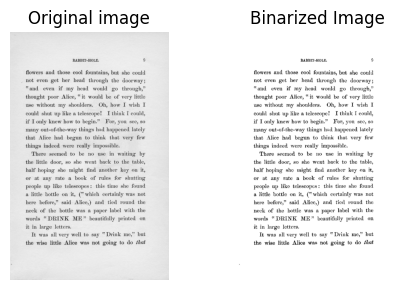

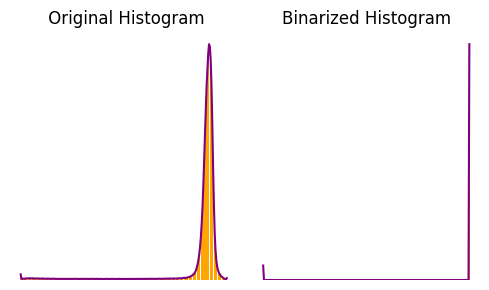


Parameter 1 : standard deviation = 15


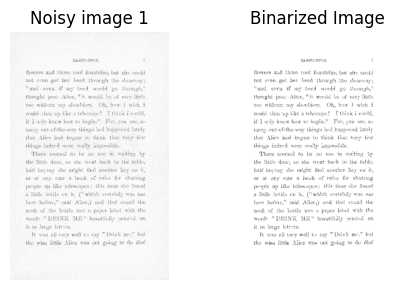

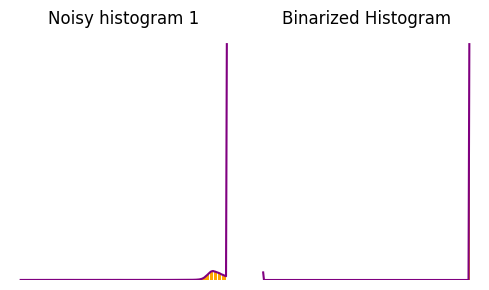


Parameter 2 : standard deviation = 50


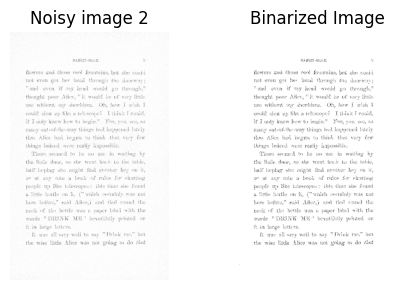

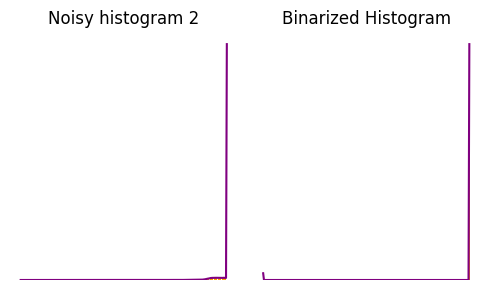

In [ ]:
##1

image1= cv2.imread('/content/bookpage_1.jpeg', 0)

org_hist= histogram(image1, 'Original histogram', 0)
thres_b= otsu(image1)
# thres_w=within(image1)

print(thres_b)
# print(thres_w)
binarized_img(image1, thres_b, 'Original image', ' Original Histogram')

# with gaussian noise

print("Parameter 1 : standard deviation = 15")
sd1= 15
noisy_img1=gaussian_noise(0,sd1,image1)
thres_noisy1= otsu(noisy_img1)
binarized_img(noisy_img1, thres_noisy1, 'Noisy image 1', 'Noisy histogram 1')


print("Parameter 2 : standard deviation = 50")
sd2=50
noisy_img2=gaussian_noise(0,sd2,image1)
thres_noisy2= otsu(noisy_img2)
binarized_img(noisy_img2, thres_noisy2, 'Noisy image 2', 'Noisy histogram 2')


150


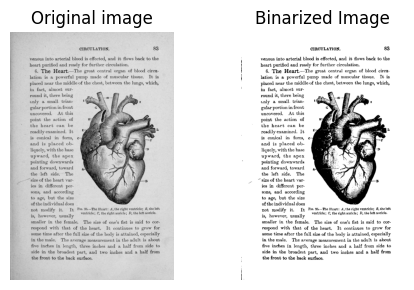

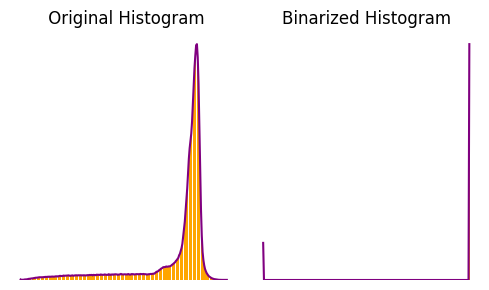


Parameter 1 : standard deviation = 15


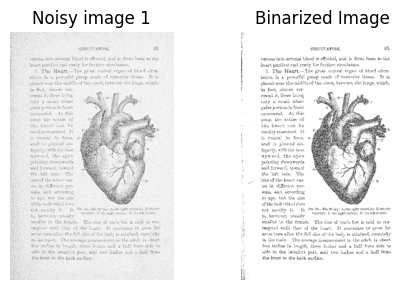

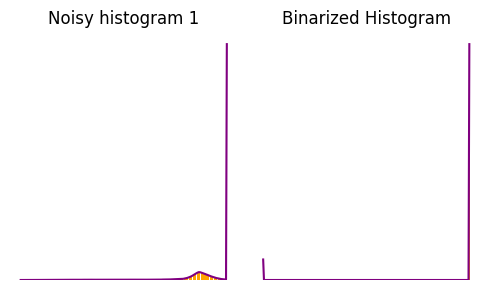


Parameter 2 : standard deviation = 50


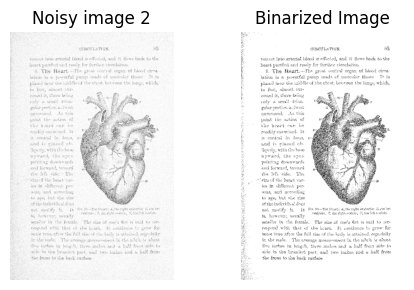

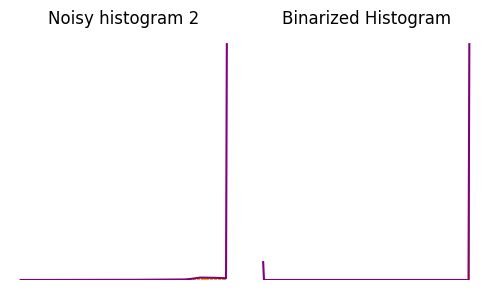

In [ ]:
##2

image2= cv2.imread('/content/bookpage_2.jpeg', 0)

org_hist= histogram(image2, 'Original histogram', 0)
thres_b= otsu(image2)
# thres_w=within(image2)

print(thres_b)
# print(thres_w)
binarized_img(image2, thres_b, 'Original image', ' Original Histogram')

# with gaussian noise

print("Parameter 1 : standard deviation = 15")
sd1= 15
noisy_img1=gaussian_noise(0,sd1,image2)
thres_noisy1= otsu(noisy_img1)
binarized_img(noisy_img1, thres_noisy1, 'Noisy image 1', 'Noisy histogram 1')


print("Parameter 2 : standard deviation = 50")
sd2=50
noisy_img2=gaussian_noise(0,sd2,image2)
thres_noisy2= otsu(noisy_img2)
binarized_img(noisy_img2, thres_noisy2, 'Noisy image 2', 'Noisy histogram 2')

178


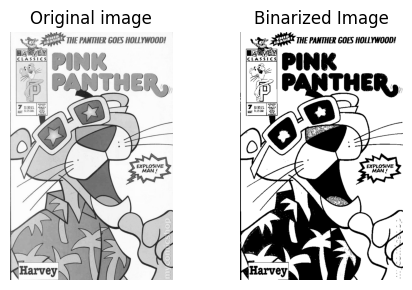

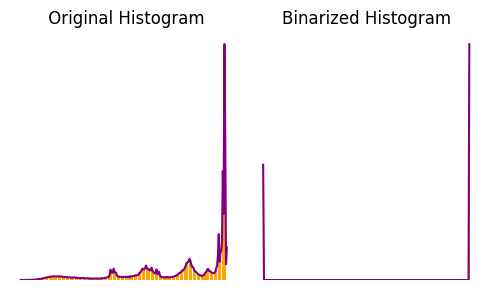


Parameter 1 : standard deviation = 15


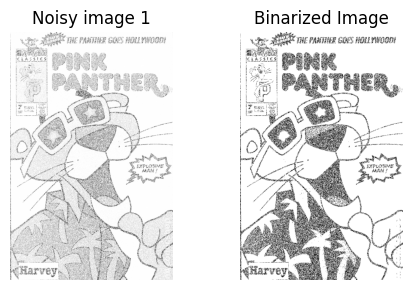

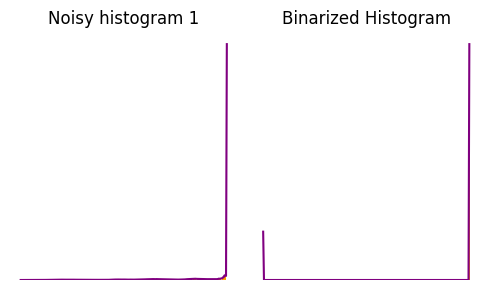


Parameter 2 : standard deviation = 50


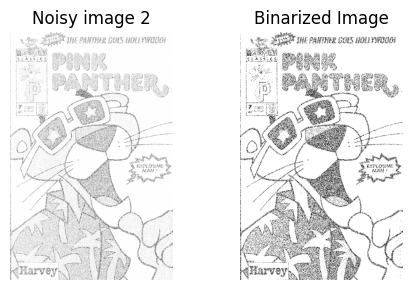

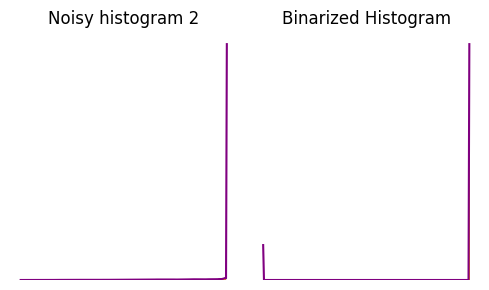

In [ ]:
##3

image3= cv2.imread('/content/panther.jpeg', 0)

org_hist= histogram(image3, 'Original histogram', 0)
thres_b= otsu(image3)
# thres_w=within(image3)

print(thres_b)
# print(thres_w)
binarized_img(image3, thres_b, 'Original image', ' Original Histogram')

# with gaussian noise

print("Parameter 1 : standard deviation = 15")
sd1= 15
noisy_img1=gaussian_noise(0,sd1,image3)
thres_noisy1= otsu(noisy_img1)
binarized_img(noisy_img1, thres_noisy1, 'Noisy image 1', 'Noisy histogram 1')


print("Parameter 2 : standard deviation = 50")
sd2=50
noisy_img2=gaussian_noise(0,sd2,image3)
thres_noisy2= otsu(noisy_img2)
binarized_img(noisy_img2, thres_noisy2, 'Noisy image 2', 'Noisy histogram 2')

126


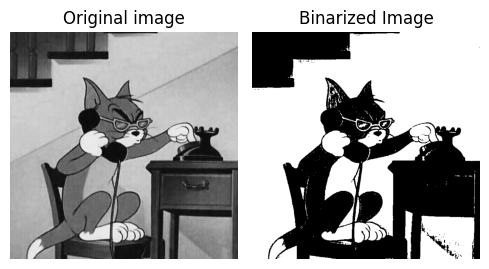

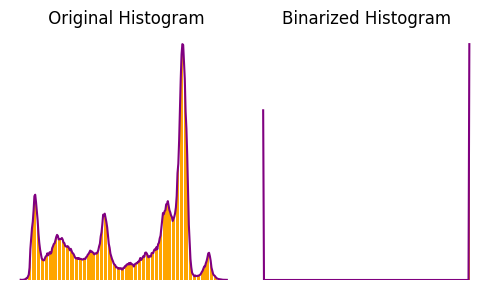


Parameter 1 : standard deviation = 15


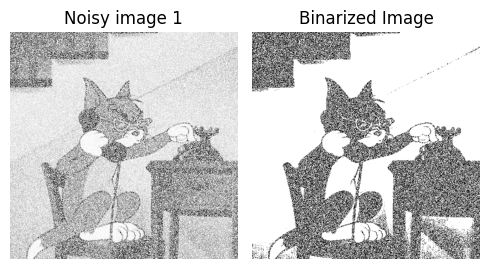

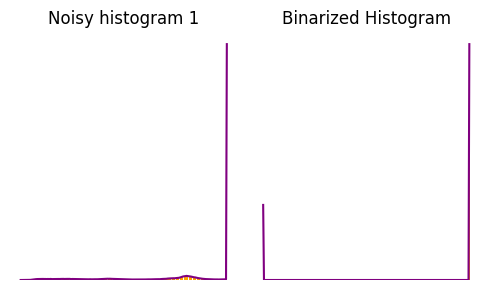


Parameter 2 : standard deviation = 50


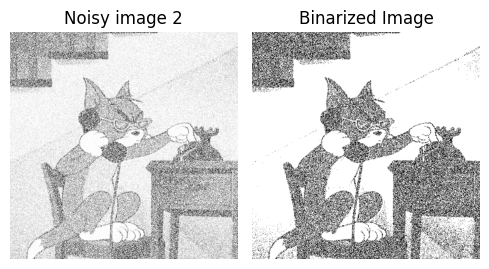

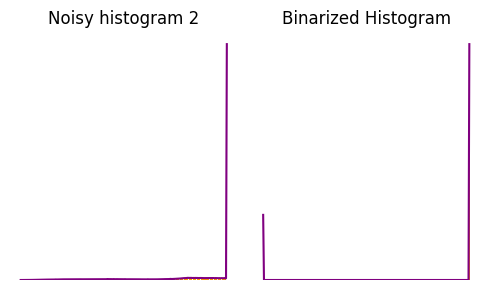

In [ ]:
##4

image4= cv2.imread('/content/tom.jpeg', 0)

org_hist= histogram(image4, 'Original histogram', 0)
thres_b= otsu(image4)
# thres_w=within(image4)

print(thres_b)
# print(thres_w)
binarized_img(image4, thres_b, 'Original image', ' Original Histogram')

# with gaussian noise

print("Parameter 1 : standard deviation = 15")
sd1= 15
noisy_img1=gaussian_noise(0,sd1,image4)
thres_noisy1= otsu(noisy_img1)
binarized_img(noisy_img1, thres_noisy1, 'Noisy image 1', 'Noisy histogram 1')


print("Parameter 2 : standard deviation = 50")
sd2=50
noisy_img2=gaussian_noise(0,sd2,image4)
thres_noisy2= otsu(noisy_img2)
binarized_img(noisy_img2, thres_noisy2, 'Noisy image 2', 'Noisy histogram 2')
